In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts

import matplotlib.pyplot as plt
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

import seaborn as sns; sns.set_theme() 


<div class="alert alert-info">

<b>Сегодня</b>
    
<b>Программа семинара № 11: </b>


Доверительные интервалы.
Асимптотические доверительные интервалы.
Точные интервалы для нормальных выборок.
Доверительные интервалы для средних в python.
Точные доверительные интервалы для разности средних.
Доверительный интервал для разности средних в python.
Точные доверительный интервалы для дисперсии.
Точный доверительный интервал для отношения дисперсий.
Доверительные интервалы для дисперсии в python.
    
----------------------------------
    
<b>Программа семинара № 12: </b>    
    
    
Проверка статистических гипотез (теоретическое введение). Гипотезы согласия, однородности, независимости, гипотезы о параметрах распределения. Ошибки первого и 
второго рода, р-значение и уровень значимости, алгоритм проверки статистической гипотезы и интерпретация результатов. Гипотеза о нормальности распределения. 
Критерии Шапиро-Уилка и Колмогорова-Смирнова. Несущественные отклонения от нормальности. Сравнение выборок. Независимые и парные выборки. Выбор между tкритерием Стъюдента, критерием Манна-Уитни-Вилкоксона и критерием Муда. Разновидности t-критериев Стъюдента и сравнение дисперсий. Визуализация при 
сравнениях. Односторонние и двусторонние тесты. Независимость. Коэффициенты корреляции Пирсона, Кендалла и Спирмена, типичные ошибки при изучении связи 
между двумя явлениями. Визуальная проверка выводов.

chromedriver.exe
flat.csv
people_data_clustering.csv
sberbank.csv



#  Точные доверительные интервалы 

Будем работать с данными по стоимости квартир в москве из таблички `flat.csv`.


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [4]:
def norm_conf_int(alpha, mean_hat, std_hat, margin=5):
    """
        Строит 95% асимптотически-нормальный доверительный интервал
    """
    
    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = stats.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)
    
    for i in [left, right]: 
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)
        
        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)
        
        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = stats.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

__Описание переменных:__

```
n – номер квартиры по порядку
price – цена квартиры в $1000
totsp – общая площадь квартиры, кв.м.
livesp жилая площадь квартиры, кв.м.
kitsp – площадь кухни, кв.м.
dist – расстояние от центра в км.
metrdist – расстояние до метро в минутах
walk – 1 – пешком от метро, 0 – на транспорте
brick 1 – кирпичный, монолит ж/б, 0 – другой
floor 1 – этаж кроме первого и последнего, 0 – иначе.
code – число от 1 до 8, при помощи которого мы группируем наблюдения по
подвыборкам:
1. Наблюдения сгруппированы на севере, вокруг Калужско-Рижской линии
метрополитена
2. Север, вокруг Серпуховско-Тимирязевской линии метрополитена
3. Северо-запад, вокруг Замоскворецкой линии метрополитена
4. Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена
5. Юго-восток, вокруг Люблинской линии метрополитена
6. Юго-восток, вокруг Таганско-Краснопресненской линии метрополитена
7. Восток, вокруг Калиниской линии метрополитена
8. Восток, вокруг Арбатско-Покровской линии метрополитена
```


In [5]:
df = pd.read_csv('../data/flat.csv', sep='\t')
print(df.shape)
df.head()

(2040, 11)


,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


# Доверительные интервалы для среднего

Построим $95\%$ асимптотический доверительный интервал для средней стоимости квартиры. Построим точный доверительный интервал для средней стоимости квартиры. Какой из них оказался уже? Почему? 

__Асимптотический доверительный интервал:__

$$
\bar x \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat s^2}{n}}.
$$

> __Предположения:__ 
В выборке нет аномалий, собиралась независимо, тогда среднее асимптотически нормально распределено (ЦПТ) 

In [8]:
# вручную 
norm_rv = stats.norm() # N(0, 1)

alpha = 0.05

z_crit = norm_rv.ppf(1 - alpha/2)

mu_hat = df.price.mean() 
var_hat = df.price.var(ddof=1)
n = df.price.count()

left = mu_hat - z_crit*np.sqrt(var_hat/n)
right = mu_hat + z_crit*np.sqrt(var_hat/n)

print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))

Доверительный интервал [125.2; 129.7] ширины 4.502


In [10]:
mu_hat = df.price.mean() 
sd_hat = df.price.std(ddof=1)/np.sqrt(n)

stats.norm.interval(0.95, loc=mu_hat, scale=sd_hat)

(125.24534794254012, 129.74778931236185)

(125.24534794254012, 129.74778931236185)

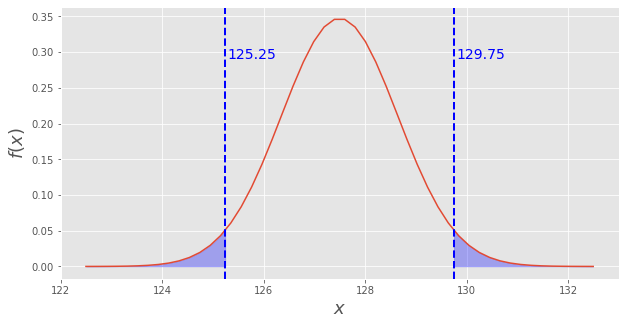

In [11]:
alpha = 0.05
mu_hat = df.price.mean() 
sd_hat = df.price.std(ddof=1)/np.sqrt(n)

norm_conf_int(alpha, mu_hat, sd_hat, margin=5)

__Точный доверительный интервал:__

$$
\bar x \pm t_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat s^2}{n}}.
$$

> __Предположения:__ 
Выборка пришла из нормального распределения, дисперсия неизвестна

In [17]:
# вручную 
n = df.price.count()
t_rv = stats.t(n - 1)

alpha = 0.05
t_crit = t_rv.ppf(1 - alpha/2)

mu_hat = df.price.mean() 
var_hat = df.price.var(ddof=1)


left = mu_hat - t_crit*np.sqrt(var_hat/n)
right = mu_hat + t_crit*np.sqrt(var_hat/n)

print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))

Доверительный интервал [125.2; 129.7] ширины 4.505


In [18]:
n

2040

In [11]:
# Оказался немного шире, но похож, так как:
# t(n) => N(0,1) при n -> inf 

In [19]:
# пакетом 
n = df.price.count()
mu_hat = df.price.mean()
sd_hat = df.price.std(ddof=1) / np.sqrt(n)

# тут 0.95 это 1 - alpha
left, right = stats.t.interval(0.95, df=(n-1), loc=mu_hat, scale=sd_hat)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))


Доверительный интервал [125.2; 129.7] ширины 4.505


> Видим, что интервалы не сильно отличаются друг от друга, из-за того, что у нас в выборке много наблюдений. При большом числе степеней свободы распределение Стьюдента похоже на нормальное. Тем не менее даже при большом количестве наблюдений точный доверительный интервал оказывается немного шире. 

__Построим $99\%$ точные доверительные интервалы для всех районов. В какие из них попало общее среднее? Построим красивую визулизацию.__m

In [20]:
df.head()

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [21]:
df_agg = df.groupby('code')['price'].agg(['mean', 'std', 'count'])
df_agg

,mean,std,count
code,,,
1,134.411765,49.619507,272
2,110.316279,29.518448,215
3,148.246377,70.573565,345
4,148.693780,73.656832,209
5,115.779762,31.507483,336
6,109.964981,32.976595,257
7,114.230088,33.897495,226
8,136.744444,48.639263,180


In [24]:
alpha = 0.01

df_agg['t_crit'] = df_agg['count'].apply(lambda w: stats.t(w - 1).ppf(1 - alpha/2))

# на сколько отступать вправо и влево от математического ожидания
df_agg['step'] =  df_agg['t_crit']  * df_agg['std']/np.sqrt(df_agg['count'])
df_agg

,mean,std,count,t_crit,step
code,,,,,
1,134.411765,49.619507,272,2.594092,7.804650
2,110.316279,29.518448,215,2.598998,5.232150
3,148.246377,70.573565,345,2.590197,9.841589
4,148.693780,73.656832,209,2.599672,13.245198
5,115.779762,31.507483,336,2.590585,4.452889
6,109.964981,32.976595,257,2.595170,5.338326
7,114.230088,33.897495,226,2.597856,5.857718
8,136.744444,48.639263,180,2.603574,9.438884


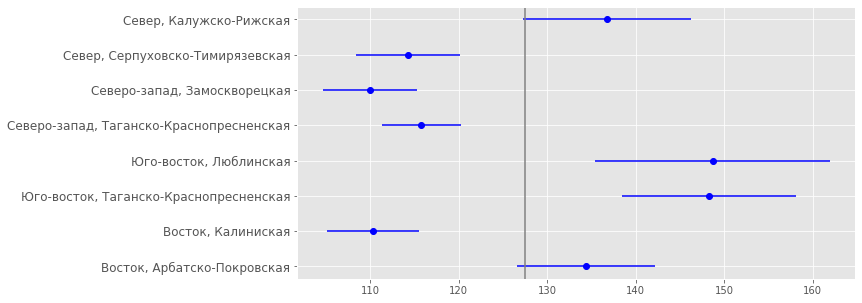

In [25]:
district = [
    'Север, Калужско-Рижская', 'Север, Серпуховско-Тимирязевская', 
    'Северо-запад, Замоскворецкая', 'Северо-запад, Таганско-Краснопресненская', 
    'Юго-восток, Люблинская', 'Юго-восток, Таганско-Краснопресненская',
    'Восток, Калиниская', 'Восток, Арбатско-Покровская'
]

center = df_agg['mean'].values
step = df_agg['step'].values

mu_hat = df.price.mean() # общее среднее 

plt.figure(figsize=(10,5))

plt.errorbar(center, np.arange(center.size),  xerr = step, 
             capsize=0, fmt="o", color="blue")

plt.yticks(np.arange(center.size - 1, -1, -1), district, fontsize=12);
plt.axvline(mu_hat, 0, color='grey');

__Выводы:__ 

- В среднем, самая дорогая недвижимость находится на Юго-востоке. Самая дешёвая на Северо-западе. 

# Доверительный интервал для разности средних

Построим $95\%$ асимптотический доверительный интервал для разницы в средней стоимости квартир в монолитных и панельных домах.

$$
\bar x - \bar y \pm z_{crit} \cdot \sqrt{\frac{\hat\sigma_x^2}{n_x} + \frac{\hat\sigma_y^2}{n_y}}
$$

In [27]:
x = df[df.brick == 1].price.values
y = df[df.brick == 0].price.values

diff = x.mean() - y.mean() 
nx, ny = x.size, y.size
diff_sd = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)

left, right = stats.norm.interval(0.95, loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))

Доверительный интервал [23.04; 34.81] ширины 11.77


Предположим, что дисперсии неизвестны, но равны.

$$
\bar x - \bar y \pm t_{crit} \cdot \sqrt{\frac{s^2}{n_x} + \frac{s^2}{n_y}}
$$

In [28]:
diff = x.mean() - y.mean()
nx, ny = x.size, y.size

s2 = ((nx - 1)*x.var() + (ny - 1)*y.var())/(nx + ny - 2)
diff_sd = np.sqrt(s2/nx + s2/ny)

left, right = stats.t.interval(0.95, df=(nx + ny - 2), loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))

Доверительный интервал [24.28; 33.58] ширины 9.297


In [30]:
x.var(), y.var()

(4264.981392232218, 1668.1298841576563)

Предположим, что дисперсии неизвестны и не равны. Построим приближённый доверительный интервал (интервал Уэлча).m

In [31]:
diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_sd = np.sqrt(x.var()/nx + y.var()/ny)

u = (x.var() / nx + y.var() / ny) ** 2
d = (x.var()**2) / (nx**2 * (nx - 1)) + (y.var()**2)/ (ny**2* (ny - 1))
nu =  u/d 
print("Число степеней свободы:", nu)

left, right = stats.t.interval(0.95, df=nu, loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))


Число степеней свободы: 911.4012642833161
Доверительный интервал [23.49; 34.37] ширины 10.88


In [32]:
nx, ny

(659, 1381)

In [22]:
x.std(), y.std()  # Знаки не в ту сторону => при малых выборках не очень верим

(65.30682500498871, 40.842745796012004)

> Все три доверительных интервала из-за больших объёмов выборки снова оказались похожи. Выборочные дисперсии довольно сильно отличаются друг от друга, из-за этого использование доверительного интервала с предпосылкой о их равенстве некорректно.

__Выводы:__ 

- В среднем, на уровне значимости $5\%$, квартиры в монолитных домах стоят дороже, чем в панельных. Ноль нигде не попадает в доверительный интервал.  

# Доверительный интервал для дисперсии

Предполагая нормальность распределения цен, построим $95\%$ доверительный интервал для дисперсии стоимости квартир. 

$$
\frac{(n - 1) \cdot s^2}{\chi_{n-1}^2 \left(\frac{\alpha}{2} \right)} \le \sigma^2 \le \frac{(n - 1) \cdot s^2}{\chi_{n-1}^2 \left(1 - \frac{\alpha}{2} \right)}
$$


> __Предположения:__ 
Выборка пришла из нормального распределения, математическое ожидание неизвестно, выполняется теорема Фишера


In [34]:
alpha = 0.05 

n = df.price.count()
var_hat = df.price.var(ddof=1)

chi_l, chi_u = stats.chi2.ppf([1-alpha/2, alpha/2], df = n - 1)

left = (n - 1) * var_hat/chi_l
right = (n - 1) * var_hat/chi_u

print("Доверительный интервал [{:.5}; {:.5}] ширины {:.5}".format(left, right, right - left))


Доверительный интервал [2533.5; 2864.5] ширины 331.01


Сделаем то же самое, но в разбивке по районам. 

In [40]:
df_agg = df.groupby('code')['price'].agg(['var', 'count'])

alpha = 0.05
df_agg['ch_l'] = df_agg['count'].apply(lambda w: stats.chi2.ppf(1-alpha/2, df = w - 1))
df_agg['ch_u'] = df_agg['count'].apply(lambda w: stats.chi2.ppf(alpha/2, df = w - 1))

df_agg['left'] =  (df_agg['count'] - 1) * df_agg['var']/df_agg['ch_l']
df_agg['right'] =  (df_agg['count'] - 1) * df_agg['var']/df_agg['ch_u']

df_agg

,var,count,ch_l,ch_u,left,right
code,,,,,,
1,2462.095507,272,318.493509,227.293087,2094.949704,2935.539707
2,871.338752,215,256.407893,175.378164,727.226026,1063.225252
3,4980.628075,345,397.276692,294.510332,4312.702181,5817.575378
4,5425.328855,209,249.834911,169.951073,4516.856343,6639.960458
5,992.721500,336,387.599359,286.187623,858.003747,1162.040827
6,1087.455800,257,302.211810,213.574668,921.170767,1303.472401
7,1149.040157,226,268.437839,185.348344,963.105785,1394.854843
8,2365.777902,180,217.940765,143.844791,1943.070379,2943.966485


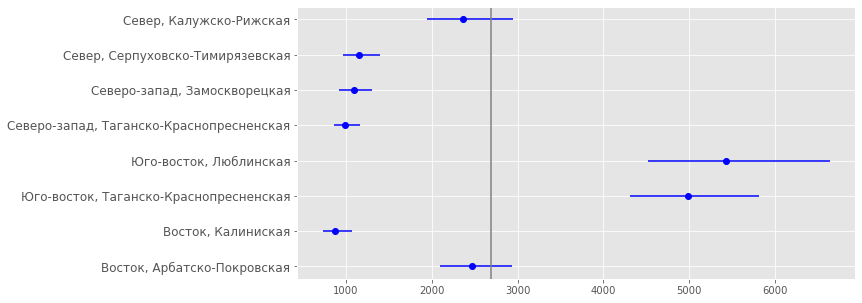

In [41]:
district = [
    'Север, Калужско-Рижская', 'Север, Серпуховско-Тимирязевская', 
    'Северо-запад, Замоскворецкая', 'Северо-запад, Таганско-Краснопресненская', 
    'Юго-восток, Люблинская', 'Юго-восток, Таганско-Краснопресненская',
    'Восток, Калиниская', 'Восток, Арбатско-Покровская'
]

center = df_agg['var'].values
step = np.array([df_agg['var'].values - df_agg['left'].values, 
                 df_agg['right'].values - df_agg['var'].values])

var_hat = df.price.var()

plt.figure(figsize=(10,5))

plt.errorbar(center, np.arange(center.size),  xerr = step, 
             capsize=0, fmt="o", color='blue')

plt.yticks(np.arange(center.size - 1, -1, -1), district, fontsize=12);
plt.axvline(var_hat, 0, color='grey');

__Выводы:__ 

- На Юго-Востоке самый большой разброс в ценах. Как покупатель, я найду здесь более разнообразные предложения. Так происходит из-за того, что с одной стороны районы близки к центру и здесь есть респектабельная недвижимость. С другой стороны, в районах довольно много советской застройки с плохой планировкой и ремонтом. 

# Доверительный интервал для отношения дисперсий

Предполагая нормальность распределения, построим $95\%$-ый доверительный интервал для отношения дисперсии стоимости квартир в монолитных домах и в панельных домах. 


$$
\frac{s^2_m}{s^2_n} \cdot F_{\frac{\alpha}{2}}(n,m) \le \frac{\sigma^2_m}{\sigma^2_n} \le  \frac{s^2_m}{s^2_n} \cdot F_{1 - \frac{\alpha}{2}}(n,m)
$$

In [42]:
alpha = 0.05

x = df[df.brick == 1].price.values
y = df[df.brick == 0].price.values

n, m = x.size - 1, y.size - 1
sn, sm = x.var(), y.var()

left = sm / sn * stats.f(n, m).ppf(alpha/2)
right = sm / sn * stats.f(n, m).ppf(1 - alpha/2)

print("Доверительный интервал [{:.5}; {:.5}] ширины {:.5}".format(left, right, right - left))

Доверительный интервал [0.34243; 0.44536] ширины 0.10293


In [54]:
x.std(),  y.std()

(65.30682500498871, 40.842745796012004)

__Выводы:__ 

- Единица не попала в доверительный интервал. Дисперсии в ценах на монолитное жильё и на панельное различаются. Цены на монолитное жильё обладают более высокой дисперсией. 

# А можно ли было пользоваться нормальным распределением?

Распределение цен выглядит не очень нормальным.

<AxesSubplot:>

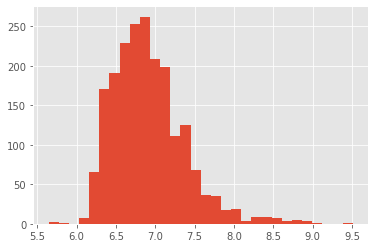

In [59]:
df.price.hist(bins=50, density=True);


Распределение логарифмов цен оказывается более похожим на нормальное.

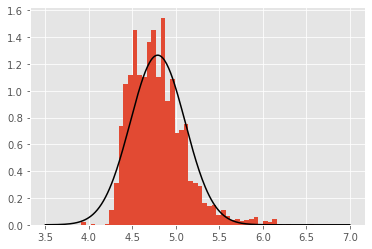

In [60]:
df.price.apply(np.log).hist(bins=50, density=True);

x = df.price.apply(np.log).values

xs = np.linspace(3.5, 7, 300)
ys = stats.norm(loc=np.mean(x), scale=np.std(x, ddof=1)).pdf(xs)
plt.plot(xs, ys, color="black");

Можно формально проверить гипотезу о том, имеет ли какая-то выборка нормальное распределение с помошью теста Колмогорова-Смирнова. О нём мы подробнее поговорим в будущем, а сейчас просто воспользуемся. 

In [61]:
stats.kstest(df.price, 'norm', args=(df.price.mean(), df.price.std(ddof=1)))

KstestResult(statistic=0.1508501598050489, pvalue=5.415515510735646e-41)

In [62]:
stats.kstest(x, 'norm', args=(np.mean(x), np.std(x, ddof=1)))

KstestResult(statistic=0.07697286130504083, pvalue=5.856877429594e-11)

В обоих ситуациях `pvalue` очень низкое, это говорит о том, что выборка не распределена нормально.

<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_5/pEbNtDxzx0Q.jpg" height="500" width="500"> 


#  Ошибки, которые мы совершаем

В этой тетрадке мы: 

- оценим ошибки первого и второго рода для теста о доле с помощью симуляций (его мы применяли для Джеймса Бонда)
- посмотрим на то, как можно рассчитать число наблюдений необходимое для конкретных величин ошибок

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from tqdm.notebook import tqdm

plt.style.use('ggplot')
%matplotlib inline

# 1. Симулируем ошибки 1 и 2 рода 

Проверка гипотезы о равенстве доли $p = 0.5$  на уровне значимости $\alpha$.

$$
\begin{aligned}
&H_0: \hspace{2mm} p = 0.5 \\
&H_1: \hspace{2mm} p > 0.5 
\end{aligned}
$$

In [64]:
def prop_asy_test(x, p0=0.5, alpha=0.05):
    p = x.mean()
    z_obs = (p - p0)/np.sqrt(p0*(1-p0)/x.size)
    pval = 1 - stats.norm.cdf(z_obs)  # p-value
    return pval

__Уровень значимости (ошибка первого рода)__ - вероятность отвергнуть гипотезу $H_0$, когда она верна. Попробуем с помощью симуляций вычислить её для проверки гипотезы о среднем.

Когда мы проверяем гипотезу, мы фиксируем уровень значимости. Давайте убедимся, что он действительно оказывается таким, каким мы его зафиксировали.

In [67]:
n_obs = 10**5 
res = np.zeros(n_obs)

bern_rv = stats.bernoulli(p=0.6)


for i in tqdm(range(n_obs)):
    x = bern_rv.rvs(100)
    res[i] = prop_asy_test(x)

In [68]:
np.mean(res < 0.05) 

0.62175

__Ошибка второго рода__ - вероятность не отвергнуть гипотезу $H_0$, когда она неверна.

Ошибку второго рода мы минимизируем по остаточному принципу. Давайте узнаем какого размера она в нашем эксперименте.

In [ ]:
n_obs = 10**5 
res = np.zeros(n_obs)

bern_rv = stats.bernoulli(p=0.6)

for i in tqdm(range(n_obs)):
    x = bern_rv.rvs(100)
    res[i] = prop_asy_test(x)

In [ ]:
np.mean(res > 0.05)

Ошибка второго рода зашкаливает. Если увеличить число наблюдений, она уменьшится. Давайте научимся подбирать число наблюдений так, чтобы ошибка второго рода была такой, какой мы хотим. 

# Ошибка 2 рода и число наблюдений

__Мы разбирали формулу, описывающую как ошибка второго рода зависит от числа наблюдений и ошибки первого рода.__ Давайте немного подробнее посмотрим как эти три величины зависят друг от друга. 


Для простой альтернативы $(p = p_a)$:

$$
\beta = \Phi \left( \frac{\sqrt{\frac{p_0 \cdot (1 - p_0)}{n}}}{\sqrt{\frac{p_a \cdot (1 - p_a)}{n}}} \cdot z_{1 - \alpha} +  \frac{p_0 - p_a}{\sqrt{\frac{p_a \cdot (1 - p_a)}{n}}} \right),
$$

где $\Phi(x)$ - функция распределения для $N(0,1)$. Нарисуем это.

In [ ]:
alpha = np.arange(0,1,0.001)[1:]       # уровень значимости, который мы фиксируем
z_alpha = stats.norm().ppf(1 - alpha)  # разные критические значения

# наша ситуация
p0 = 0.5
pa = 0.6  # если изменить алтернативу, кривые изменятся
n = 100   # если выборка больше, гипотезы более различимы

sd0 = np.sqrt(p0*(1-p0)/n)
sda = np.sqrt(pa*(1-pa)/n)

beta = stats.norm().cdf(sd0/sda * z_alpha + (p0 - pa)/sda)

In [ ]:
plt.figure(figsize = (10, 5))

plt.plot(alpha, beta)
plt.title(r"Зависимость ошибки второго рода от ошибки первого рода", fontsize=18)
plt.xlabel(r"Ошибка первого рода")
plt.ylabel(r"Ошибка второго рода");

Посмотрим на то как ошибки зависят друг от друга в зависимости от выбора критического значения.

In [ ]:
plt.figure(figsize = (10, 5))

plt.plot(z_alpha, alpha, label = r"Ошибка первого рода")
plt.plot(z_alpha, beta, label = r"Ошибка второго рода")
plt.title(r"Зависимость ошибок от критического значения", fontsize=18)

plt.xlabel(r"Критическое значение")
plt.ylabel(r"Ошибка")
plt.legend();

> __Выводы:__ Видно, что ошибка первого и второго рода взаимосвязаны. Чем ниже ошибка первого рода, тем выше ошибка второго рода. Чем выше критическое значение, тем ниже ошибка первого рода, но тем выще ошибка второго рода. Между этими двумя ошибками надо искать баланс. 

Посмотрим на конкретную величину $\beta$ при $\alpha = 0.05$. И наоборот. 

In [ ]:
beta[alpha == 0.05]

In [ ]:
ind = np.argmin(np.abs(beta - 0.05)) # beta наиболее близкая к 5%
alpha[ind]

Если мы увеличим количество наблюдений, ошибка второго рода уменьшится. На доске мы вывели формулу, по которой это происходит: 

$$
n = \left( \frac{\sqrt{p_0 \cdot (1 - p_0) } \cdot z_{1 - \alpha} + \sqrt{p_a \cdot (1 - p_a) } \cdot z_{1 - \beta} }{p_a - p_0}  \right)^2
$$

Напишем функцию, которая по конкретным $p_a$, $\alpha$ и $\beta$ говорит нам сколько наблюдений нужно собрать.

In [1]:
def find_n(p0, pa, alpha=0.05, beta=0.05):
    za = stats.norm().ppf(1 - alpha)
    zb = stats.norm().ppf(1 - beta)
    sn = (np.sqrt(p0*(1 - p0))* za + np.sqrt(pa*(1 - pa))* zb)/(pa - p0)
    return sn**2

In [ ]:
find_n(0.5, 0.6, alpha=0.05, beta=0.05)

In [ ]:
find_n(0.5, 0.6, alpha=0.01, beta=0.01)

In [ ]:
find_n(0.5, 0.51, alpha=0.01, beta=0.01)

- Чем меньше ошибки 1/2 рода, тем больше наблюдений нам нужно
- Чем ниже размер эффекта, который мы хотим детектировать $p_0 - p_a$, тем больше наблюдений нам нужно

__Ситуация:__ 

Менеджер Алексей хочет проверить правда ли Джеймс Бонд отличает взболтанный мартини от смешанного. Алексей полагает, что если Бонд правда умеет различать напитки, то размер эффекта должен быть как минимум $0.2$. Алексей хотел бы получить ошибки первого и второго рода равные 1%. Сколько наблюдений ему нужно? 

In [ ]:
find_n(0.5, 0.7, alpha=0.01, beta=0.01)

На практике перед запуском эксперимента обычно готовят табличку, в которой смотрят на то, сколько наблюдений понадобится для поиска эффекта разного размера при разных значениях ошибок первого и второго рода. Подробнее это мы обсудим, когда будем говорить про АБ-тесты. 

# Выводы:

- Ошибка 1 и 2 рода конфликтуют друг с другом. Обычно когда понижаешь одну из ошибок, растёт другая. 
- Зная как вычисляется ошибка второго рода, можно прикидывать сколько нам надо собрать наблюдений, чтобы та оказалась меньше некоторого порога.
- __Борьба за мощность:__ найти тест, обладающей наибольшей мощностью (наименьшей ошибкой второго рода) при фиксированной ошибке первого рода